# To do 
1) save plots,
2) add break point parts,
3) add statistical test analysis.

# Market Indices

In [1]:
#!/usr/bin/env python3.10.4
import sys
import datetime as dt
import pandas as pd
import pandas_market_calendars as mcal
sys.path.append('../lib/')
from functions import *

In [2]:
# Stok indices
# Retrieve financial data for indices from "https://finance.yahoo.com/world-indices"
# ^GSPC: Standard and Poor's 500
# ^DJI: Dow Jones Industrial Index
# ^IXIC: NASDAQ_Composite
# ^RUT: Russel 2000
# S&P 500 (^SPX) options: https://finance.yahoo.com/quote/%5ESPX/options?p=%5ESPX

In [25]:
# Set end date
#end = dt.datetime.now()
end = dt.datetime(2022,3,28)
# Set start date (1 year distance)
#start = end - dt.timedelta(weeks=52)
start = dt.datetime(2021,3,26)

# To evaluate the difference between the dates in terms of business days.
print(f'Days between dates: {(end - start).days} days')

nyse = mcal.get_calendar('NYSE')
bizdays = nyse.valid_days(start_date=start, end_date=end)

print(f'Business days between dates: {len(bizdays)} days')

Days between dates: 367 days
Business days between dates: 254 days


In [26]:
# We concentrate on the Standard and Poor's 500 Index
GSPC_df = read_data_from_yahoo('^GSPC', start, end)
GSPC_df['Date'] = pd.to_datetime(GSPC_df['Date'],
                                 format='%Y-%m-%d')#.dt.strftime('%d-%m-%Y')

# rate of return
r = GSPC_df['Adj Close'].diff(periods=1) / GSPC_df['Adj Close'].to_numpy()
GSPC_df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-03-26,3978.189941,3917.120117,3917.120117,3974.540039,5467850000,3974.540039
1,2021-03-29,3981.830078,3943.250000,3969.310059,3971.090088,4619840000,3971.090088
2,2021-03-30,3968.010010,3944.350098,3963.340088,3958.550049,4103570000,3958.550049
3,2021-03-31,3994.409912,3966.979980,3967.250000,3972.889893,4564980000,3972.889893
4,2021-04-01,4020.629883,3992.780029,3992.780029,4019.870117,4151240000,4019.870117
...,...,...,...,...,...,...,...
249,2022-03-22,4522.000000,4469.100098,4469.100098,4511.609863,3962880000,4511.609863
250,2022-03-23,4501.069824,4455.810059,4493.100098,4456.240234,4014360000,4456.240234
251,2022-03-24,4520.580078,4465.169922,4469.979980,4520.160156,3573430000,4520.160156
252,2022-03-25,4546.029785,4501.069824,4522.910156,4543.060059,3577520000,4543.060059


We concentrate on the Standard and Poor's 500 Index.
<br> In case, we also remove the last row, which appears to be essentially a repetition of the penultimate row.

In [27]:
# Compute the logarithm return for each index dataframe
GSPC_df = log_return(GSPC_df)

GSPC_df

,Date,High,Low,Open,Close,Volume,Adj Close,y_lr,y_plr
0,2021-03-29,3981.830078,3943.250000,3969.310059,3971.090088,4619840000,3971.090088,-0.000868,-0.086839
1,2021-03-30,3968.010010,3944.350098,3963.340088,3958.550049,4103570000,3958.550049,-0.003163,-0.316283
2,2021-03-31,3994.409912,3966.979980,3967.250000,3972.889893,4564980000,3972.889893,0.003616,0.361595
3,2021-04-01,4020.629883,3992.780029,3992.780029,4019.870117,4151240000,4019.870117,0.011756,1.175583
4,2021-04-05,4083.419922,4034.439941,4034.439941,4077.909912,3999760000,4077.909912,0.014335,1.433499
...,...,...,...,...,...,...,...,...,...
248,2022-03-22,4522.000000,4469.100098,4469.100098,4511.609863,3962880000,4511.609863,0.011241,1.124070
249,2022-03-23,4501.069824,4455.810059,4493.100098,4456.240234,4014360000,4456.240234,-0.012349,-1.234863
250,2022-03-24,4520.580078,4465.169922,4469.979980,4520.160156,3573430000,4520.160156,0.014242,1.424201
251,2022-03-25,4546.029785,4501.069824,4522.910156,4543.060059,3577520000,4543.060059,0.005053,0.505338


Intercept: 4198.616275127846, Index: 1.6855590252069033


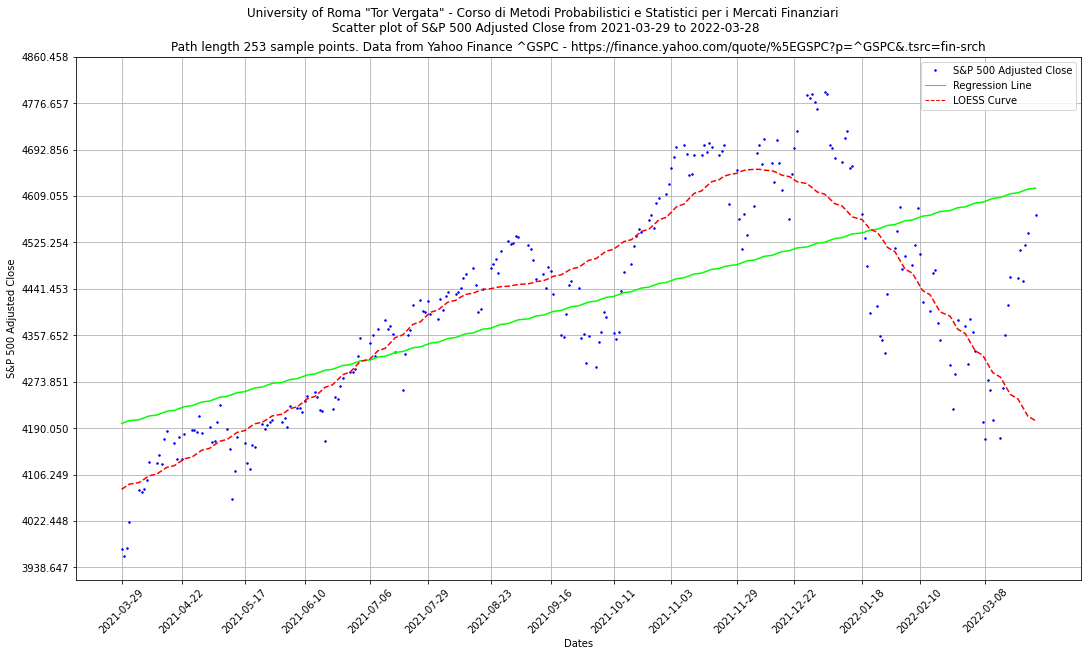

In [29]:
# Hence, we plot the GSPC adjusted close
link = "https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC&.tsrc=fin-srch"
data_visualization(GSPC_df, kind='scatter', symbol='^GSPC',
                   link=link, column='Adj Close')

Intercept: 4198.616275127846, Index: 1.6855590252069033


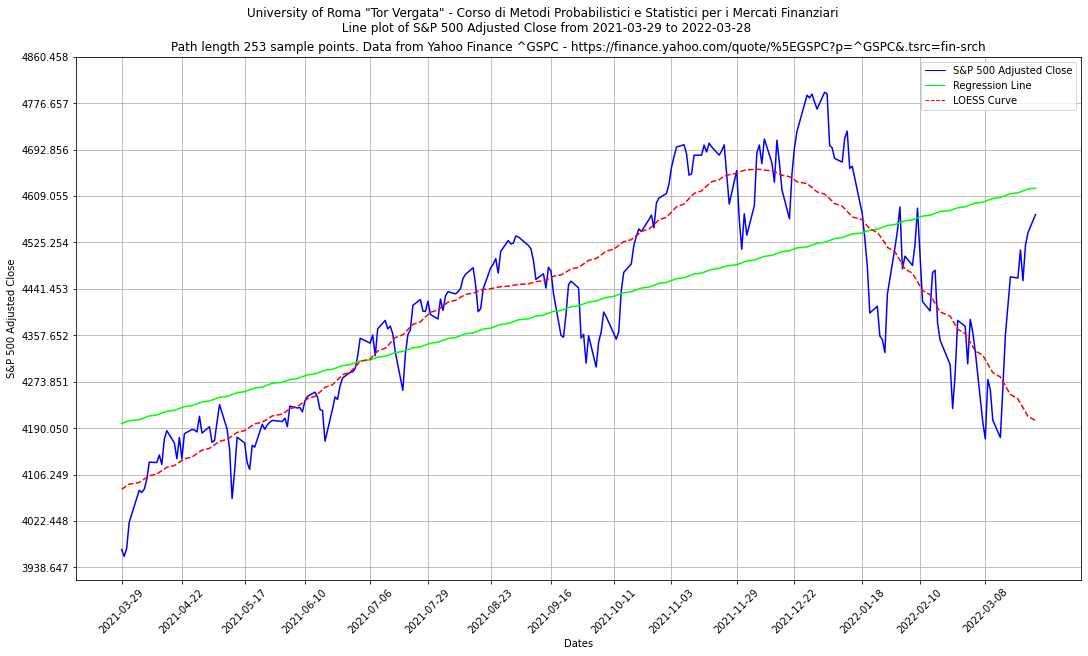

In [30]:
data_visualization(GSPC_df, kind='line', symbol='^GSPC',
                   link=link, column='Adj Close')

Intercept: 0.13259745689898048, Index: -0.0006106413080577082


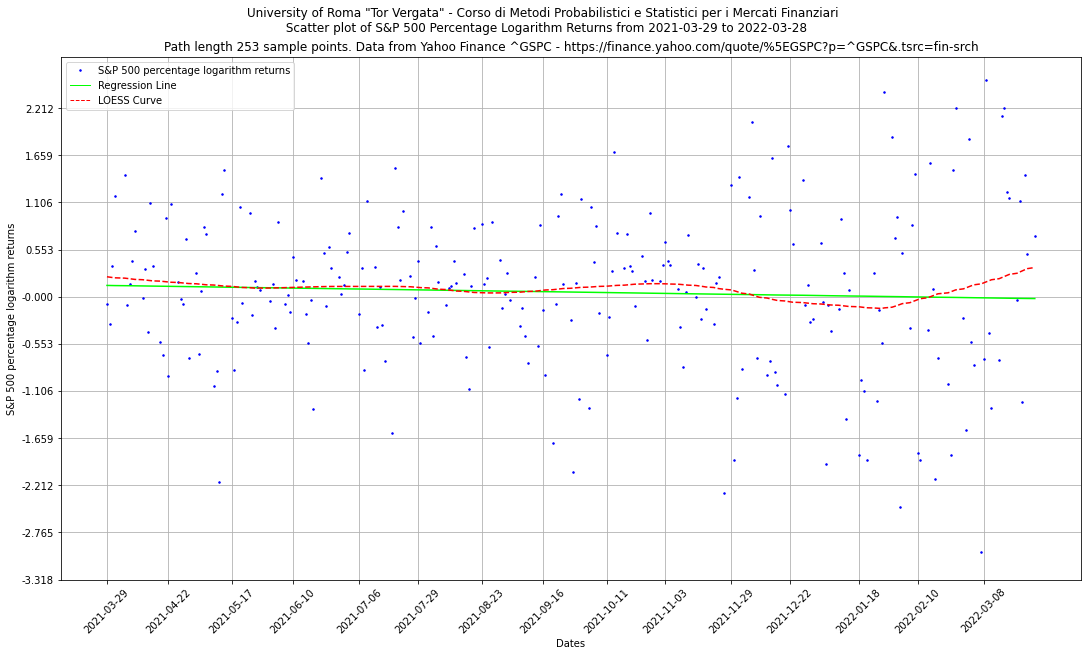

In [31]:
data_visualization(GSPC_df, kind='scatter', symbol='^GSPC',
                   link=link, column='y_plr')

Intercept: 0.13259745689898048, Index: -0.0006106413080577082


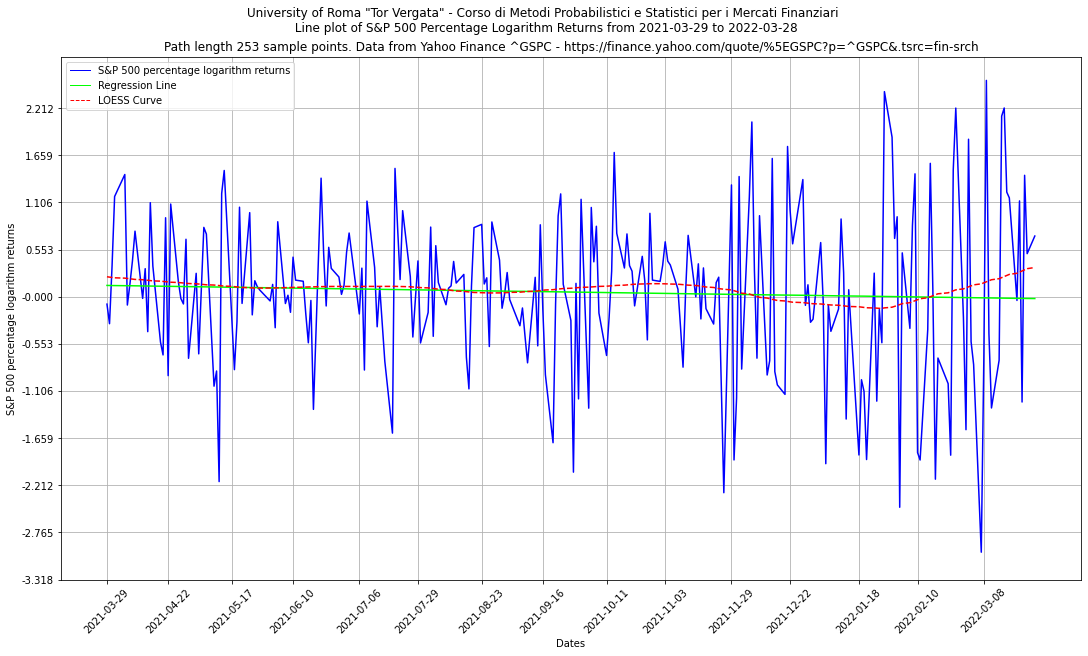

In [32]:
data_visualization(GSPC_df, kind='line', symbol='^GSPC',
                   link=link, column='y_plr')

Autocorrelogram

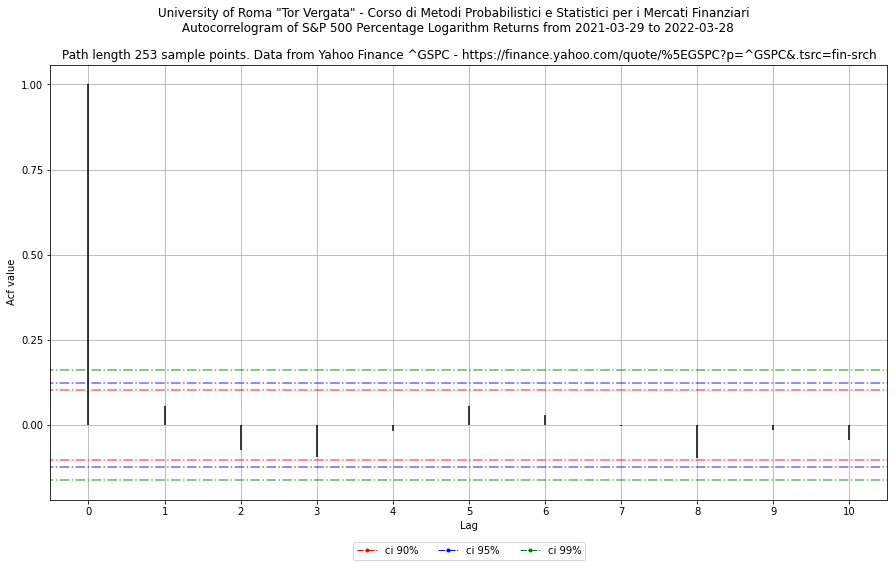

In [33]:
autocorrelogram(GSPC_df, link=link, symbol='^GSPC')

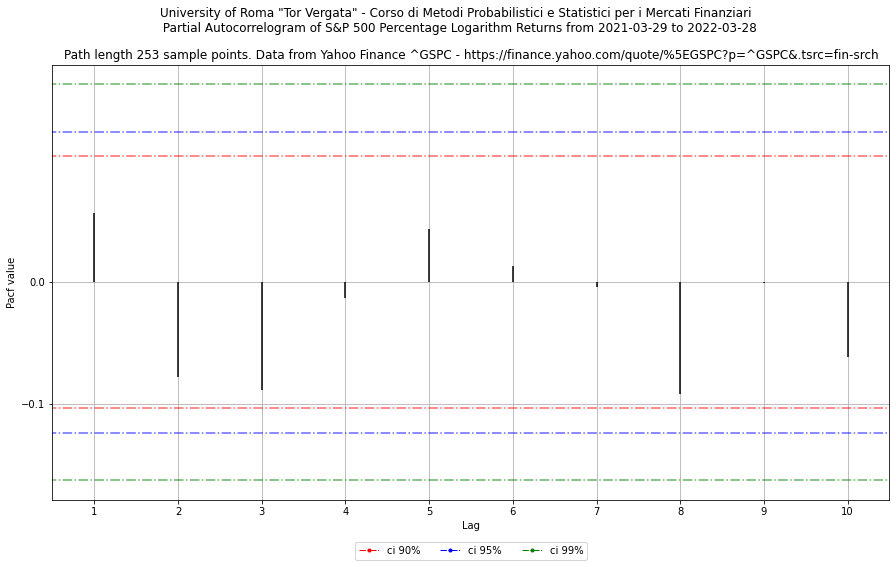

In [34]:
autocorrelogram(GSPC_df, partial=True, link=link, symbol='^GSPC')

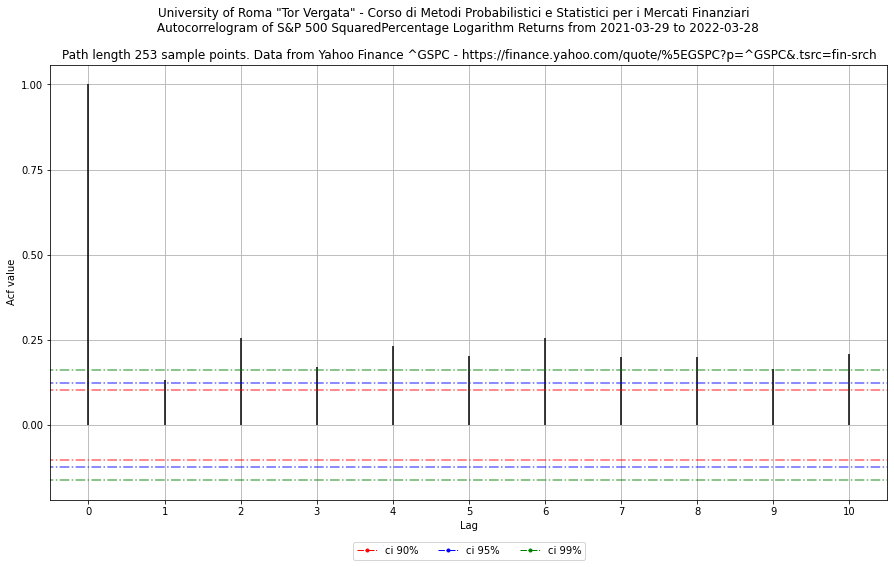

In [35]:
autocorrelogram(GSPC_df, link=link, squared=True, symbol='^GSPC')